In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data=pd.read_csv("train (3).csv")

In [16]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [17]:
y=data["price_range"].values
x_data=data.drop(["price_range"],axis=1)


In [18]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [19]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


train accuracy: 0.95375
test accuracy: 0.9425


C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-

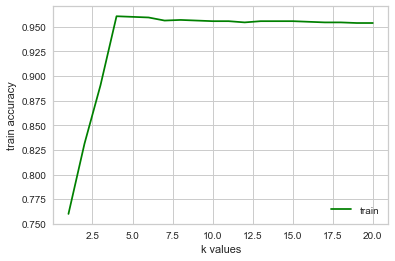

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [21]:
d={'best feature number':k,'train_score':accuracy_list_train}
df=pd.DataFrame(data=d)

In [22]:
df

,best feature number,train_score
0,1,0.760000
1,2,0.831250
2,3,0.890625
3,4,0.960625
4,5,0.960000
5,6,0.959375
6,7,0.956250
7,8,0.956875
8,9,0.956250
9,10,0.955625


In [26]:
print("max accuracy: ",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())


max accuracy:  0.960625
max accuracy id: 3


In [27]:
print("max accuracy values ",df.iloc[3])

max accuracy values  best feature number    4.000000
train_score            0.960625
Name: 3, dtype: float64


In [28]:
selector=SelectKBest(f_classif,k=5)
x_new=selector.fit_transform(x_train,y_train)
x_new_test=selector.fit_transform(x_test,y_test)

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-

In [29]:
names_train=x_train.columns.values[selector.get_support()]
names_train

array(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'],
      dtype=object)

In [30]:
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
C=[0.1,0.25,0.5,0.75,1,2]
kernel=["linear","rbf"]
gama=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]


In [33]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9493750000000001
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [34]:
from sklearn.svm import SVC

In [35]:
svm_model=SVC(C=2,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=1)

In [36]:
svm_model.fit(x_new,y_train)


SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [37]:
print("training accuracy :",svm_model.score(x_new,y_train))

training accuracy : 0.951875


In [3]:
!pip install yellowbrick

   ---------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn import svm

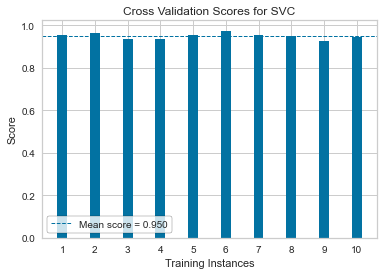

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(10)

# Create the cv score visualizer
oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()


In [39]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)


In [40]:
svm_model.fit(x_new,y_train)


SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [41]:
print("train_accuracy:",svm_model.score(x_new,y_train))
print("test_accuracy: ", svm_model.score(x_new_test,y_test))

train_accuracy: 0.951875
test_accuracy:  0.9325


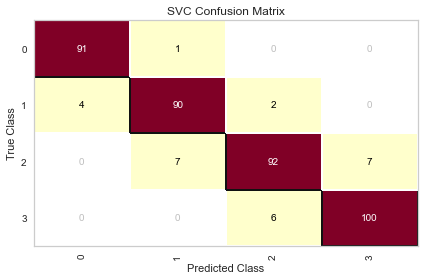

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

In [43]:
y_pred=svm_model.predict(x_new_test)
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]

In [44]:
svm_test["y_true"]=y_test
svm_test["y_pred"]=y_pred

C:\Users\shiva\AppData\Local\Temp\ipykernel_10272\158809425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_test["y_true"]=y_test
C:\Users\shiva\AppData\Local\Temp\ipykernel_10272\158809425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_test["y_pred"]=y_pred
